In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar datos

In [2]:
df_country = pd.read_csv('./data/country-data.csv')

In [3]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Manejando valores nulos

In [4]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Validando duplicados

In [5]:
df_country[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


## Analisis de la distribucion

In [6]:
int_cols = df_country.select_dtypes(exclude='object').columns

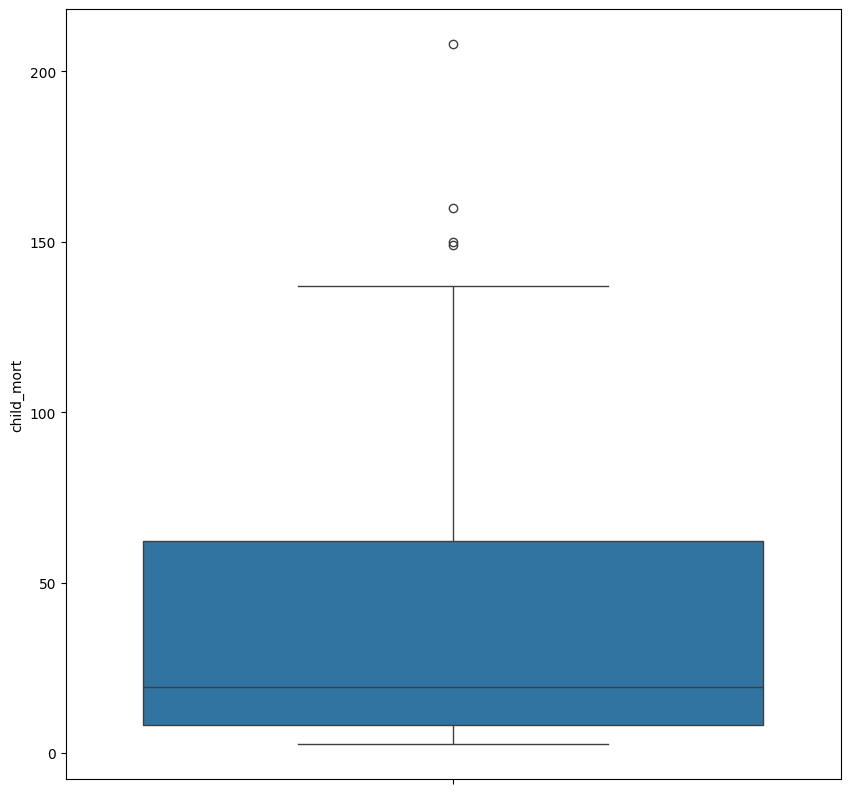

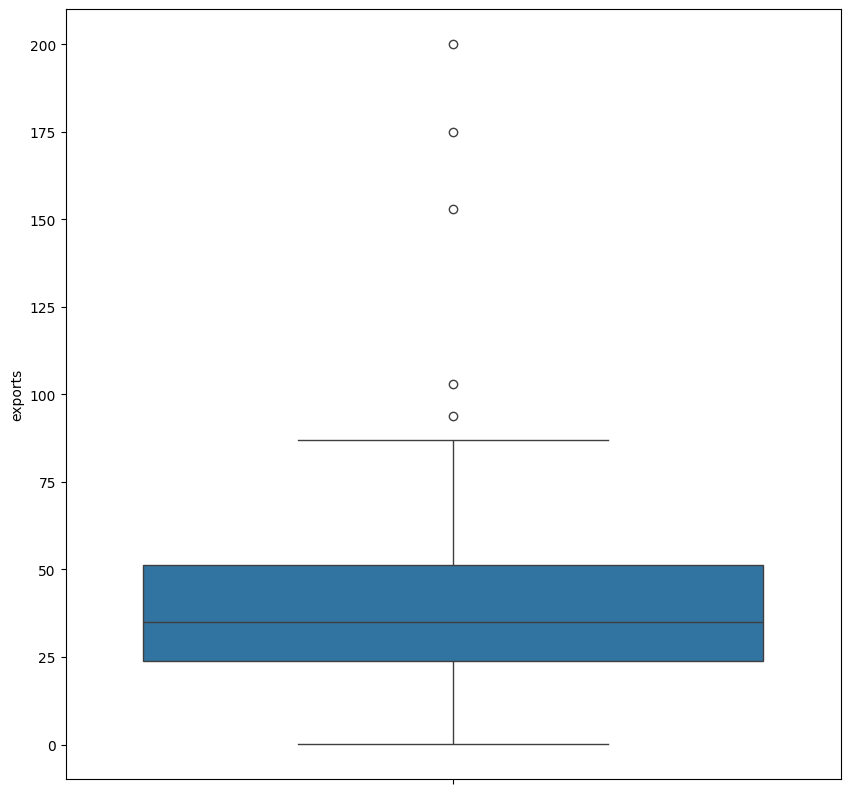

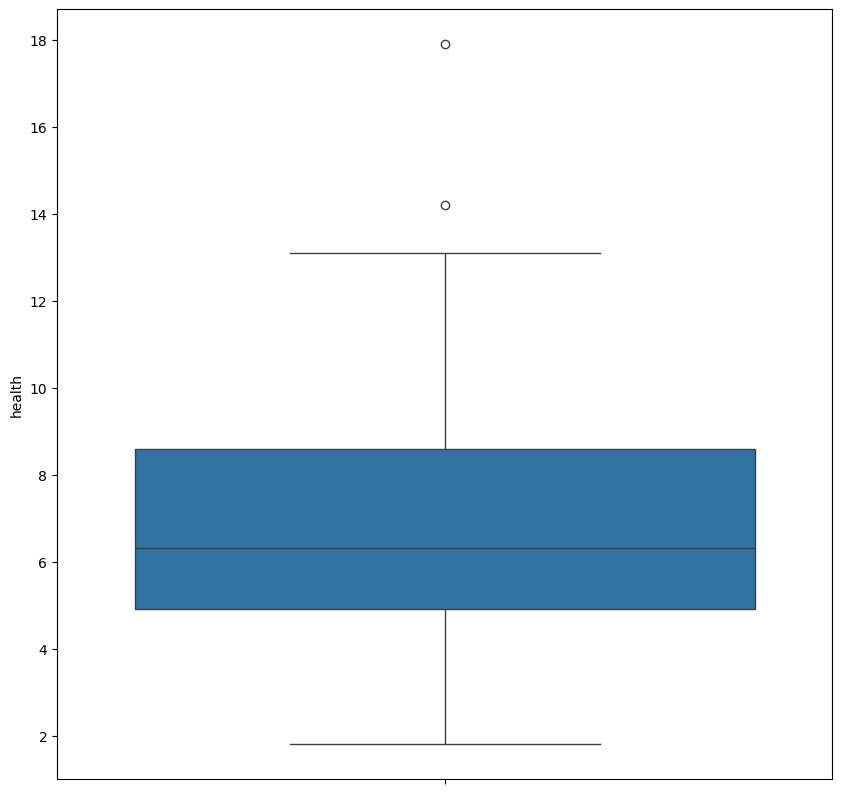

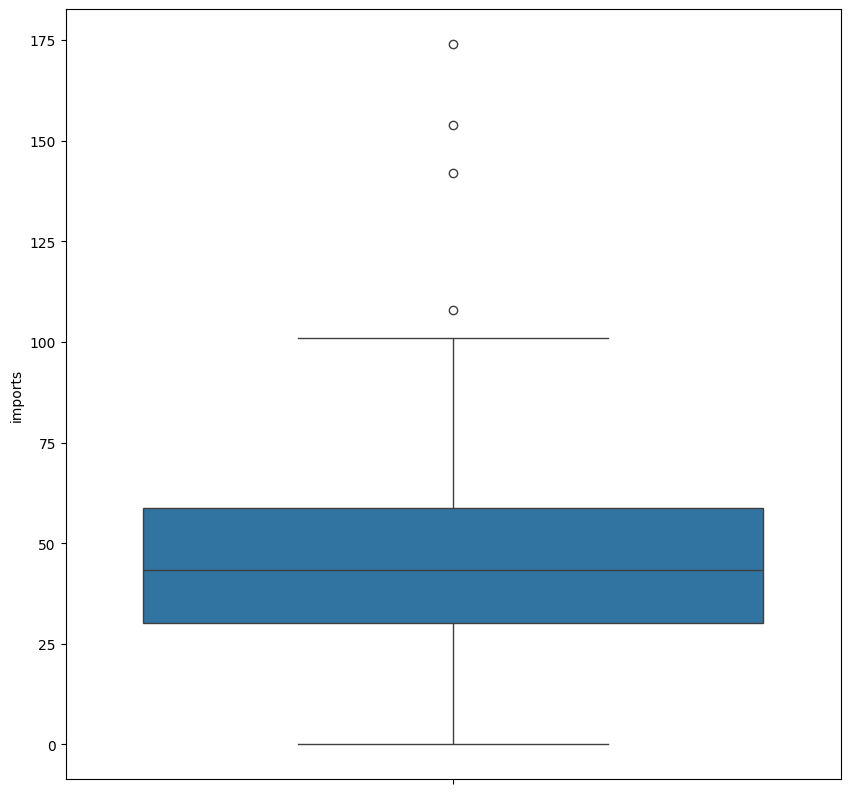

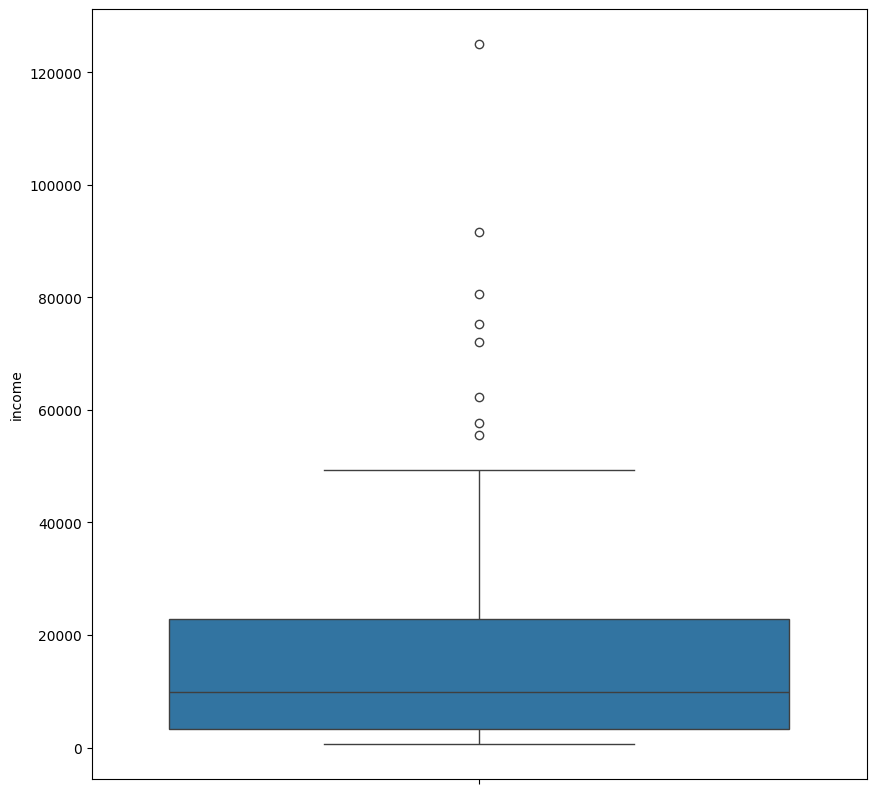

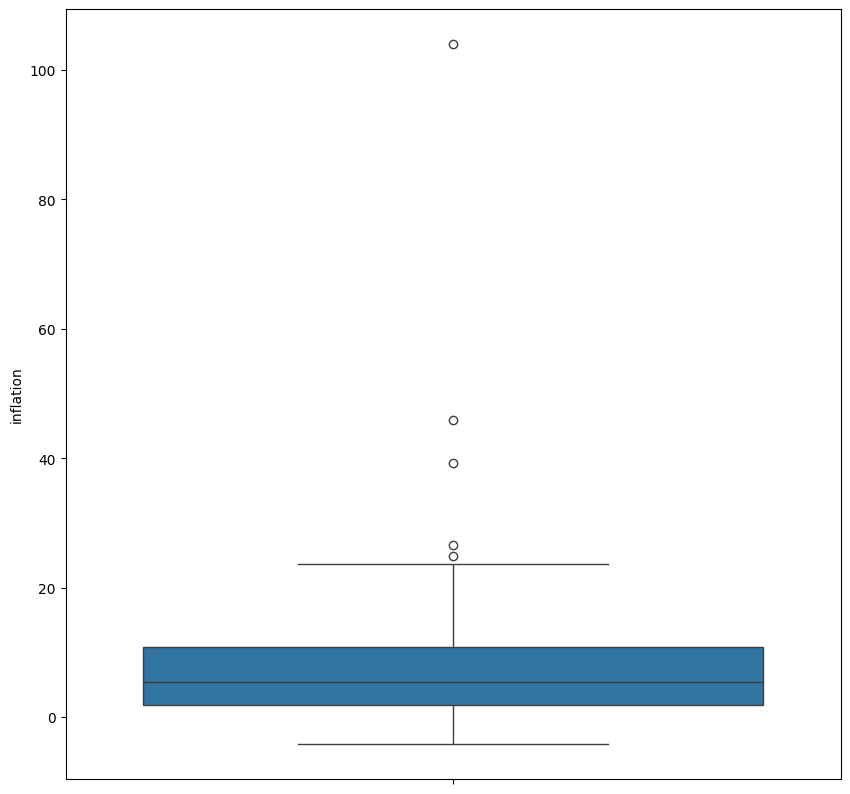

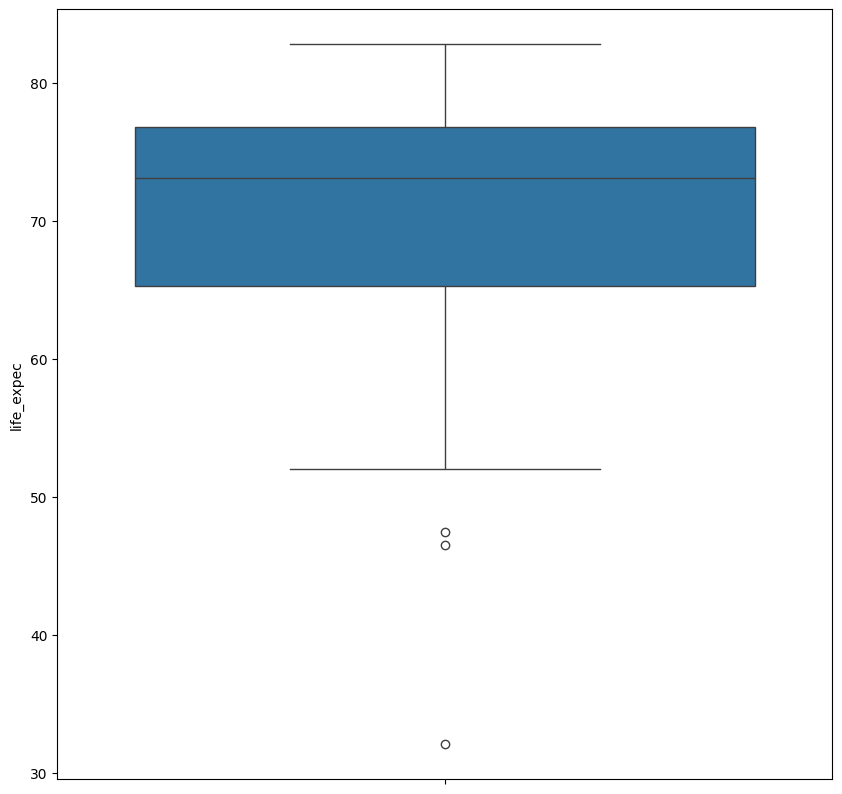

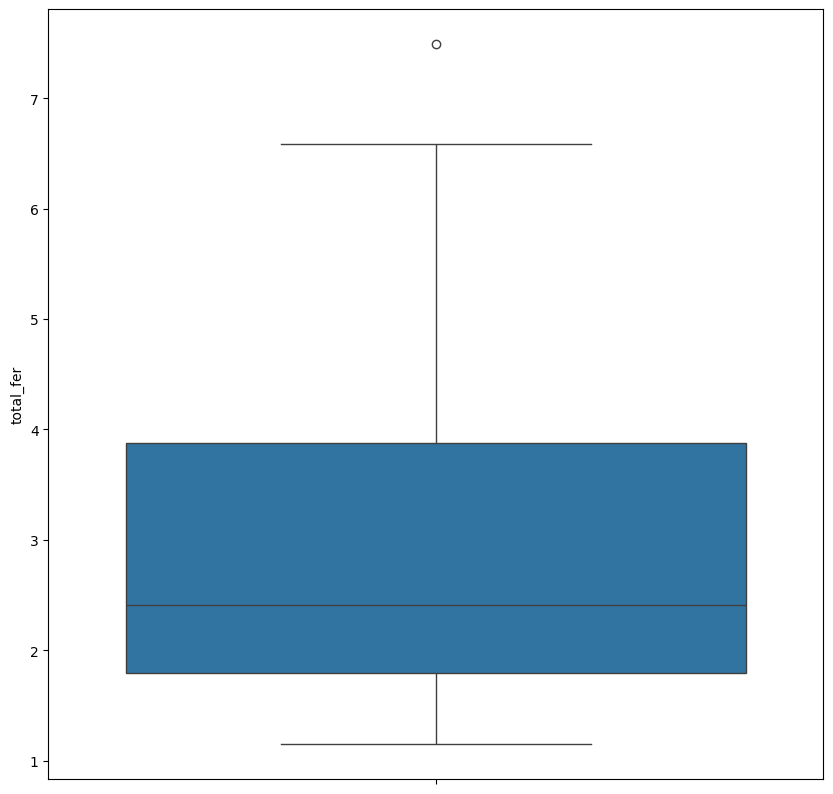

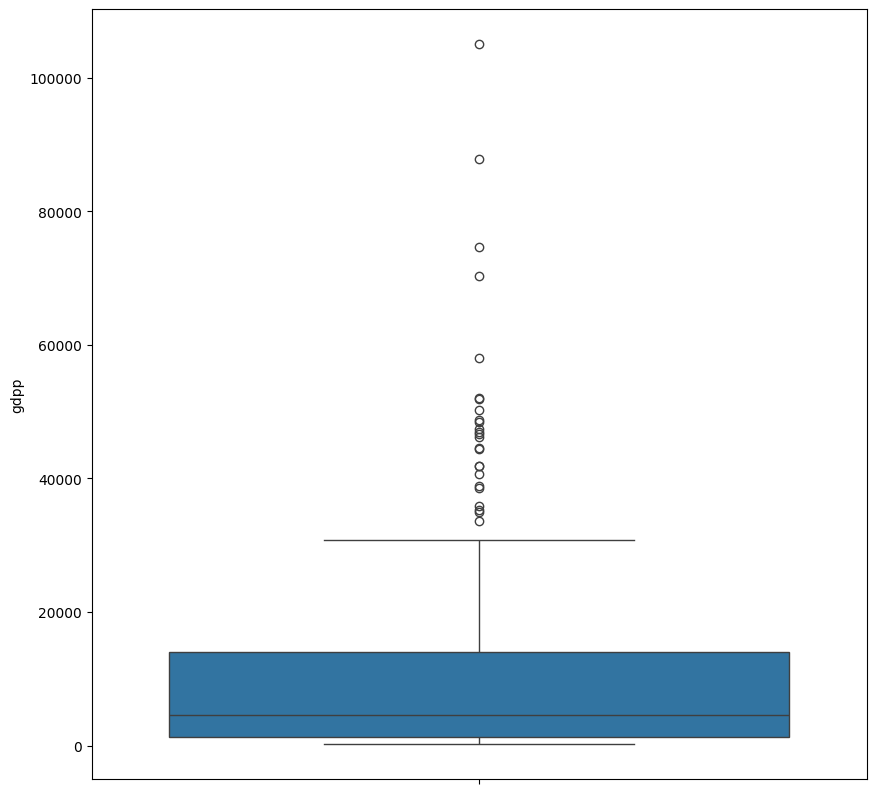

In [7]:
int_cols
for _ in int_cols:
    plt.figure(figsize=(10, 10))
    sns.boxplot(data=df_country, y= _)
    plt.show()

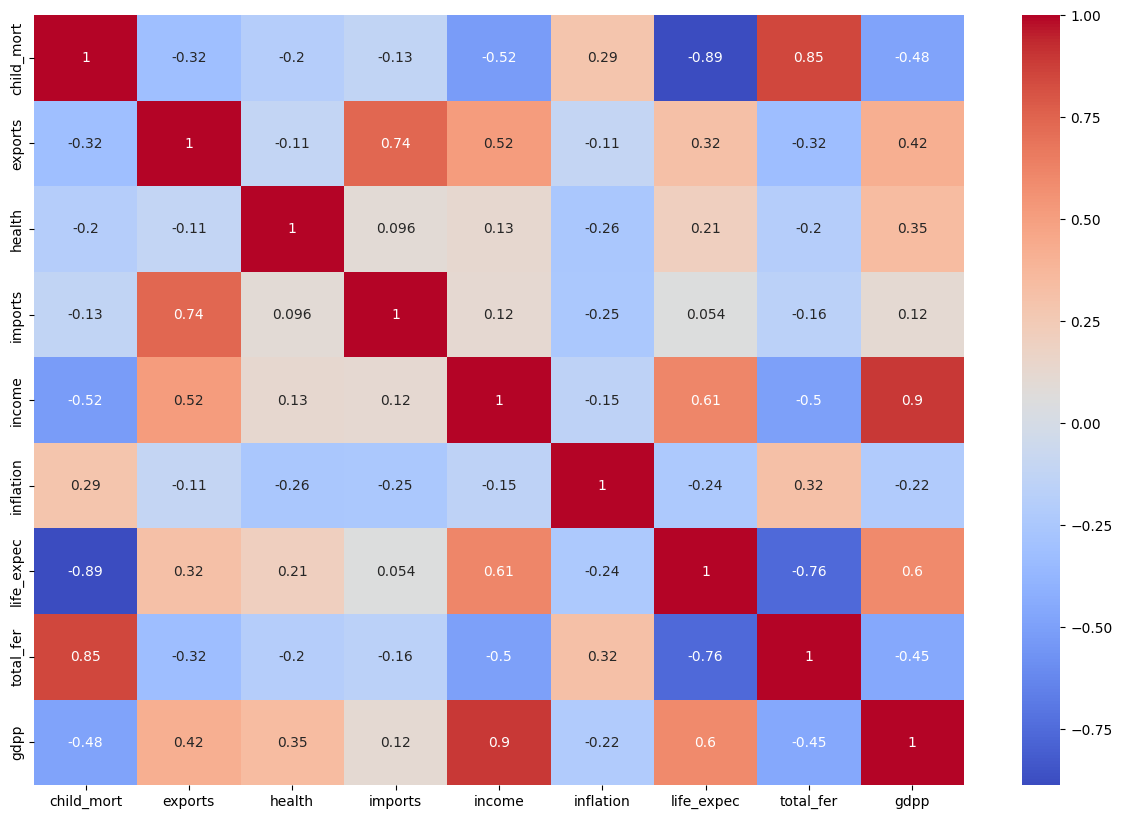

In [8]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(df_country.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.show()

## Escalar datos

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_country_scaled = scaler.fit_transform(df_country.drop('country', axis=1))

In [10]:
df_country_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]], shape=(167, 9))

In [11]:
df_country_scaled = pd.DataFrame(df_country_scaled, columns=df_country.drop('country', axis=1).columns)

In [12]:
df_country_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA()
pca.fit(df_country_scaled)
pca_data_scaled = pca.transform(df_country_scaled)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ..., -0.38300026,
        -0.41507602,  0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ..., -0.24891887,
         0.22104247, -0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ...,  0.08721359,
         0.18416209, -0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ...,  0.14362677,
         0.21759009,  0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ..., -0.06025631,
        -0.08949452,  0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ...,  0.44218462,
        -0.66433809,  0.44148176]], shape=(167, 9))

In [15]:
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


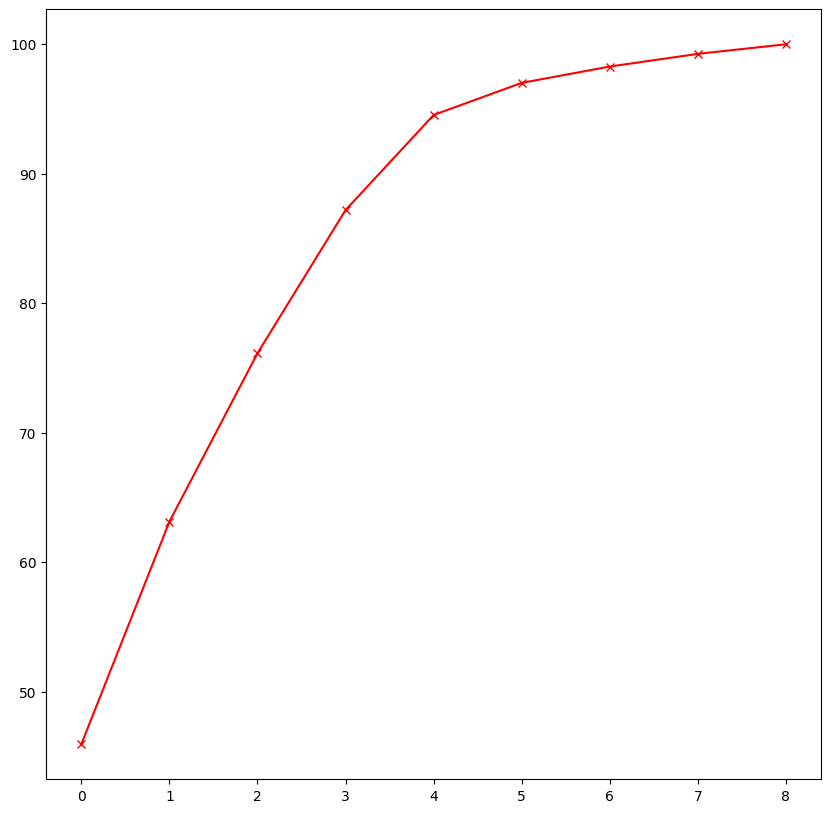

In [16]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(10, 10))
plt.plot(cum_var, 'r-x')
plt.show()

In [17]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4,5,6,7,8],axis=1, inplace=True)

In [18]:
pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


## Importar librerias para clustering

In [19]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## K-means sobre PCA

In [20]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15) 
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(pca_data_standard)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard,y))

Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\david\anaconda3\envs\ia_ptojects\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "c:\Users\david\anaconda3\envs\ia_ptojects\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\david\anaconda3\envs\ia_ptojects\Lib\threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\david\anaconda3\envs\ia_ptojects\Lib\subprocess.py", line 1601, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte
c:\Users\david\anaconda3\envs\ia_ptojects\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the

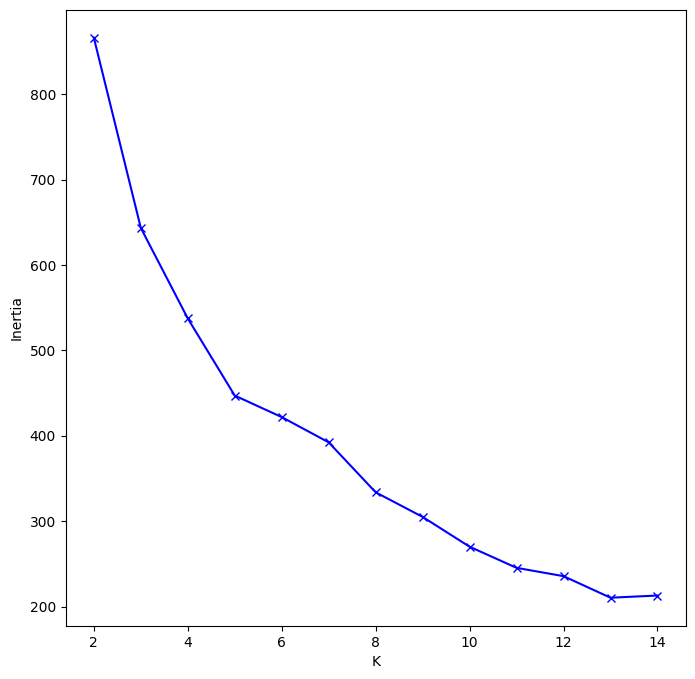

In [21]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

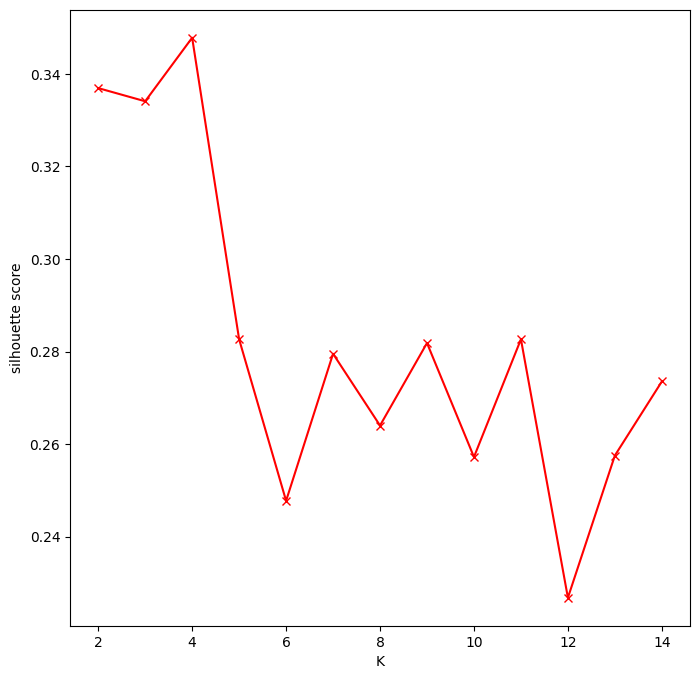

In [22]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [23]:
km = KMeans(n_clusters = 4)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y))
df_country['k_means_pca'] = y

0.34955083647021007


## SIN PCA

In [24]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15) 
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(df_country_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_country_scaled,y))

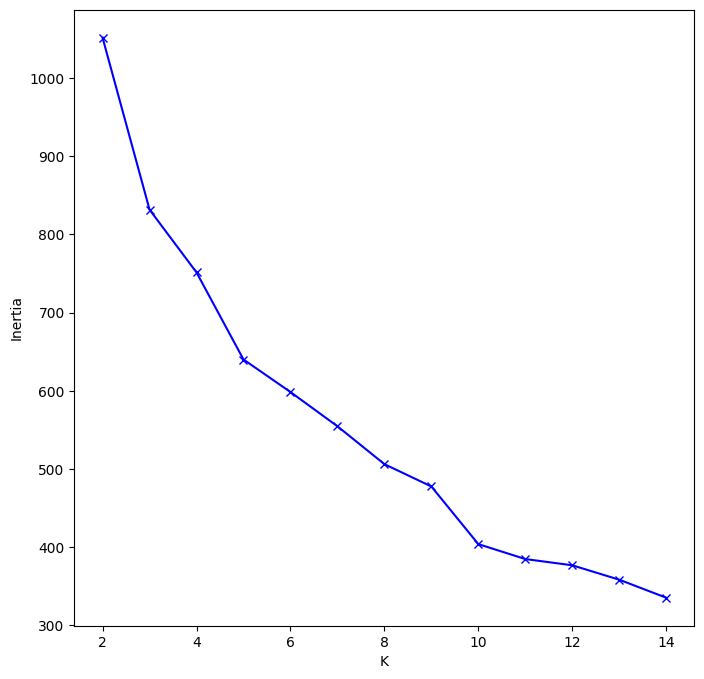

In [25]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

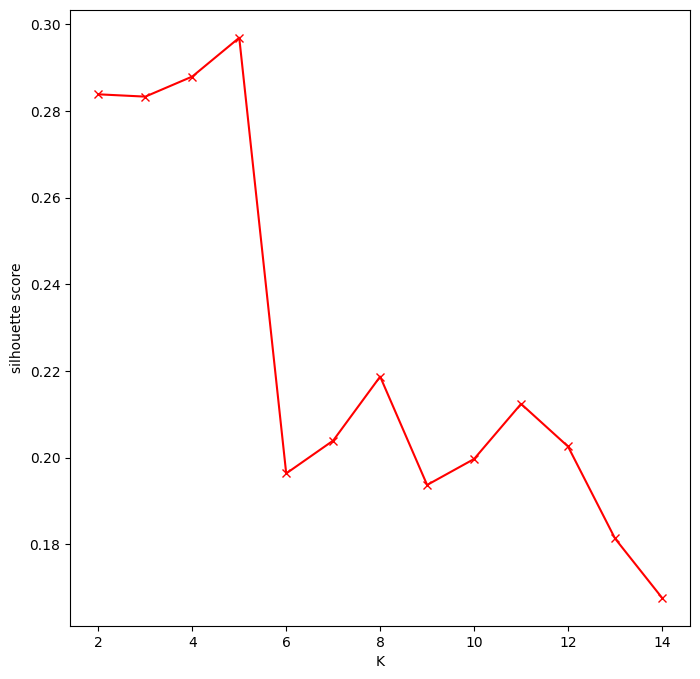

In [26]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [27]:
km = KMeans(n_clusters = 5)
y = km.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y))
df_country['k_means'] = y

0.2057255081452353


### hierarchical - PCA


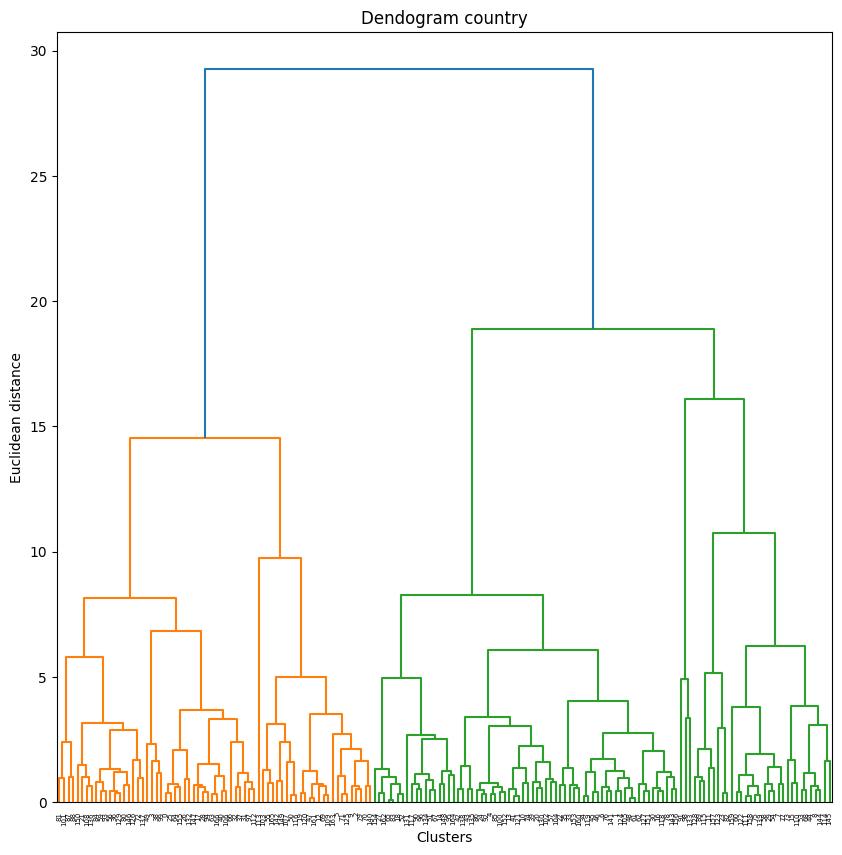

In [28]:
fig = plt.figure(figsize=(10, 10))
dendrogram_plot = dendrogram(linkage(pca_data_standard, method='ward'))
plt.title('Dendogram country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [30]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_hc))
df_country['hc_pca'] = y_hc

0.3070110704080525


### Sin PCA

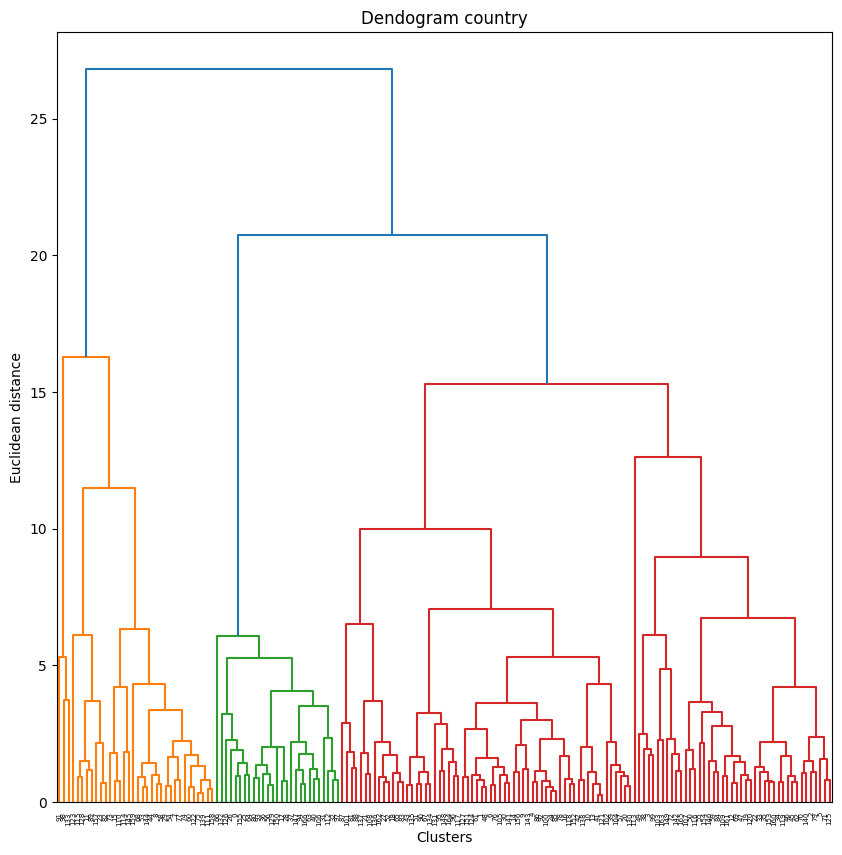

In [31]:
fig = plt.figure(figsize=(10, 10))
dendrogram_plot = dendrogram(linkage(df_country_scaled, method='ward'))
plt.title('Dendogram country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [35]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_hc))
df_country['hc'] = y_hc

0.3153134331018189
